# **HOMEWORK 1: CAUTION! CONTENTS ARE HOT** 🌋
## **DUE: *JUNE 9, 2025 @ 11:59 PM***
## **24-HR LATE DUE DATE WITH A 10% PENALTY: *JUNE 10, 2025 @ 11:59 PM***

The [NCEI/WDS Global Significant Volcanic Eruptions Database](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ngdc.mgg.hazards:G10147) is a very comprehensive collection of +600 volcanic eruptions dating from 4360 BC to the present. Due to the nature of this assignment, we will be dealing with relatively newer volcanoes (in which some are still obviously still older than anyone on Earth currently). Each eruption in the database is classified as significant if it meets one or more criteria, such as causing fatalities, incurring **damage on property** (**+$1 million**), reaching a **Volcanic Explosivity Index (VEI)** of **6 or higher**, generating a tsunami, or being linked to a significant earthquake. The VEI is a scale that measures the explosiveness of volcanic eruptions, providing insight into the magnitude and potential consequences of the eruptions. The database includes detailed information on the location, type of volcano, last known eruption, VEI, casualties, property damage, and much more.
![volcano](https://wikitravel.org/upload/shared//9/99/Volcano_de_Fuego_Banner.jpg)
**We are going to dive straight into these volcanoes (well... their dataset), to swim our way into Pandas proficiency!**

You will find the [Pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html) helpful. There are also some helpful links to guide you along the way! Don't get burned 🔥



### **DO NOT REMOVE ANY PART OF ANY OF THE QUESTIONS OR YOU LOSE CREDIT**
### *No Hardcoding either*  😋❤️‍🔥
### **REMEMBER TO SHOW ALL CODE OUTPUT (NO CREDIT OTHERWISE)**

### **Part 1: Maintenance 🤩 (25 POINTS TOTAL)**
First, we're going to familiarize ourselves with the process. As in most languages, Python looks best when its modules are imported first before any other code is written ✨

In [57]:
# Make sure these code blocks run properly and that you have properly installed the appropriate modules required.
import pandas as pd
import requests
# import other libraries here

# Make sure these code blocks run properly and that you have properly installed the appropriate modules required.
import pandas as pd
import requests
# import other libraries here

# Don't remove this
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

As you may have noticed, there's another library aside from Pandas called "[requests](https://requests.readthedocs.io/en/latest/)." **The requests library allows you to send HTTP requests to a server, retrieve the content, and process it at ease.** It's very beginner friendly for those attempting to get into webscraping (super important for collecting and creating datasets). We also recommend looking into [BeautifulSoup](https://beautiful-soup-4.readthedocs.io/en/latest/) (yeah, soup LOL), another wonderful library that can be paired with the requests library for webscraping.

As shown below, sometimes specific websites require specific headers in order to process a request to access the data.

To check if a request was processed successfully, use the [status_code](https://requests.readthedocs.io/en/latest/api/) function to see if the process returned 200.

In [58]:
# API URL and headers in case request gets denied.
api_url = "https://www.ngdc.noaa.gov/hazel/hazard-service/api/v1/volcanoes"

headers = {
    'accept': '*/*'
}

#### **TASK 1.0: Cute Webscraping (5 points)**
- To make our cute webscraper we need to **create a GET request** using the hints above.

- This particular dataset NOAA returns data from the API as ***json*** when a user makes a request.
- The json data has a particular format, so we will **extract our needed information only from the field called items** to make a dataframe (you may need to store this data before turning it into a dataframe).

- After properly scraping the data, **name this dataframe** ***df***

- Save this dataframe into a **CSV file named 'volcanoes.csv'**

**You won't need to run this cell more than once**

In [59]:
response = requests.get(api_url, headers=headers)
if response.status_code == 200:
    data = response.json()
    volcano_list = data["items"]

    df = pd.DataFrame(volcano_list)
    df.to_csv("volcanoes.csv", index=False)
else:
  print("Not working:", response.status_code)



#### **TASK 1.1: 1 Liner Thingz (3 points)**

We need to get an idea of what this dataset is going to look. In order to do that, let's take a look at some of the most [basic things](https://dataanalytics.buffalostate.edu/pandas-cheat-sheet) our dataframe has.

**Read the directions carefully and code your answer with only one line of code.**

***CAN'T USE LOOPS. DO NOT DISPLAY THE DATAFRAME, JUST YOUR CODE OUTPUT HERE.***

**1.1.1:** In one line of code and **using only one single attribute call**, output ***only the numbers*** of **datapoints and features** in the dataframe.

*Hint: The output's going to be a tuple*

In [60]:
df.shape

(200, 43)

**1.1.2:** In one line of code and **using only one single attribute call**, list the **names** of ***all the features*** in the dataframe.

In [61]:
df.columns

Index(['id', 'year', 'month', 'day', 'tsunamiEventId', 'earthquakeEventId',
       'volcanoLocationId', 'volcanoLocationNewNum', 'volcanoLocationNum',
       'name', 'location', 'country', 'latitude', 'longitude', 'elevation',
       'morphology', 'agent', 'deathsTotal', 'deathsAmountOrderTotal',
       'damageAmountOrderTotal', 'significant', 'publish', 'eruption',
       'status', 'timeErupt', 'vei', 'deathsAmountOrder', 'damageAmountOrder',
       'housesDestroyedAmountOrderTotal', 'deaths', 'injuries',
       'injuriesAmountOrder', 'injuriesTotal', 'injuriesAmountOrderTotal',
       'housesDestroyedAmountOrder', 'housesDestroyed', 'housesDestroyedTotal',
       'missingAmountOrder', 'missingAmountOrderTotal', 'missing',
       'missingTotal', 'damageMillionsDollars', 'damageMillionsDollarsTotal'],
      dtype='object')

We won't be using some of the data because there is a lot of missing data.

**1.1.3:** *In one line of code, create a **new dataframe** called **new_df** that **discards** all the features of the **old** dataframe **except for the following**:*

`id,	year, month, day,	tsunamiEventId, earthquakeEventId, volcanoLocationId, volcanoLocationNewNum, name, country, elevation, morphology, deathsTotal, vei, deaths`
*Hint: Don't use any drop function here*

In [62]:
new_df = df[['id', 'year', 'month', 'day', 'tsunamiEventId', 'earthquakeEventId', 'volcanoLocationNewNum', 'name', 'country', 'elevation', 'morphology', 'deathsTotal', 'vei', 'deaths']]

#### **TASK 1.2: 1 Liner Shenaniganz (7 points)**

We're going to tidy up the **new dataframe** a little more with some more advanced 1 liner code.

**Read the directions carefully and code your answer with only one line of code.**

**For this section, keep the method of display that is already in the box. Write your code as indicated.**

***YOU CAN'T USE ONE LINE LOOPS OR ANY KIND OF LOOP.***

**1.2.1:** *In one line of code and **using only one single function call**, **drop any row** that contains **NaN** in **any one** of the columns indicating a measure of **time**.*

In [63]:
new_df = new_df.dropna(subset=['year', 'month', 'day'])

**1.2.2:** *In one line of code, **change** the **index column** of the dataframe so that it has **1-based indexing**.*

In [64]:
new_df.index = range(1, len(new_df) + 1)

The **deathsTotal** and **deaths**  columns have approximations of the same data with alternating NaNs in each.

**1.2.3:** *In one line of code, make a **new column** called **'totalDeaths'** that takes the **max** of the values given between those* ***two*** *columns.
- If there is **NaN** in ***one column*** and a **numerical** value in the **other**, it will ***take the numerical value***.
- **Only** if there are **NaNs** in ***both columns***, the **new column will have NaN.**

In [65]:
new_df['totalDeaths'] = new_df[['deathsTotal', 'deaths']].max(axis=1)

#### **TASK 1.3: Tailoring Time (10 Points)**
It's pretty obvious that the year, month, and day look pretty weird in the dataset. We're going to have to do some hardcore cleaning on the [time](https://pandas.pydata.org/docs/user_guide/timeseries.html). We will learn more about data cleaning in class soon, but here we will perform some basic data cleaning.

- **We need to have only ONE column called** "***date***" **that contains the full date in the following format YYYY-MM-DD, not separated into three columns.**

- **Make sure there are no floating point values in the date.**
- **Sort the data from most recent to least.**
- **Remove the old columns and place the new column next to the 'id' column.**


**YOU CAN USE MULTIPLE LINES OF CODE BUT CAN'T USE LOOPS OR HARDCODE.**

**Note:** It is alright to have only a **maximum of 12 NaTs** for some dates that often go further back in time because the **datetime module** in Pandas has a year limit (unless otherwise guided).

In [66]:
new_df['date'] = pd.to_datetime(new_df[['year', 'month', 'day']], errors='coerce')
new_df = new_df.sort_values(by='date', ascending=False)

### **Part 2: Volcanic Matryoshkas 🪆 (30 POINTS TOTAL)**

Now, that most of the data has been tidied up. We will organize the data into more sizable pieces of information in order to extract useful information.
**You can use loops in the section if you wish, however your results must be displayed in a viewable manner.**

**2.1.1:** *(10 points here)*

Use the **groupby function in Pandas** to create separate dataframes for each unique country.

* **Each table must only have the columns**: 'date' 'country', 'name', and 'vei'

* **Sort** the dataframe of **each country** by **highest to lowest 'vei'**

* Use the **[display](https://ipython.readthedocs.io/en/8.26.0/api/generated/IPython.display.html)** function to show **each sorted table**

**You MUST use the groupby function here and display your results.**

In [67]:
for country, group_df in new_df.groupby('country'):
  country_table = group_df[['date', 'country', 'name', 'vei']].sort_values(by='vei', ascending=False)
  display(country_table)

,date,country,name,vei
34,1984-08-15,Cameroon,Oku Volcanic Field,NaN


,date,country,name,vei
11,1904-02-25,Comoros,Karthala,2.0


,date,country,name,vei
28,1912-12-03,"Congo, DRC",Nyamulagira,3.0
5,1977-01-10,"Congo, DRC",Nyiragongo,1.0


,date,country,name,vei
7,1907-08-04,Ethiopia,Alayta,2.0
36,NaT,Ethiopia,Dama Ali,NaN


,date,country,name,vei
35,1926-01-23,Greece,Santorini,2.0


,date,country,name,vei
79,1815-04-10,Indonesia,Tambora,7.0
77,1963-03-18,Indonesia,Agung,5.0
107,NaT,Indonesia,Gamkonora,5.0
58,1919-05-19,Indonesia,Kelud,4.0
106,1966-08-12,Indonesia,Awu,4.0
44,1872-11-03,Indonesia,Merapi,4.0
43,1872-04-15,Indonesia,Merapi,4.0
60,1966-04-26,Indonesia,Kelud,4.0
61,1990-02-10,Indonesia,Kelud,4.0
93,1983-07-23,Indonesia,Colo,4.0


,date,country,name,vei
33,1944-03-27,Italy,Vesuvius,3.0
24,1979-09-12,Italy,Etna,3.0
10,NaT,Italy,Etna,3.0
30,NaT,Italy,Campi Flegrei,3.0
20,1930-09-11,Italy,Stromboli,3.0
19,1919-05-22,Italy,Stromboli,3.0
23,1872-04-24,Italy,Vesuvius,3.0
2,NaT,Italy,Etna,3.0
6,1779-08-08,Italy,Vesuvius,3.0
13,1737-05-20,Italy,Vesuvius,3.0


,date,country,name,vei
145,NaT,Japan,Aira,5.0
148,1914-01-12,Japan,Aira,4.0
147,1781-04-11,Japan,Aira,4.0
143,1933-12-24,Japan,Kuchinoerabujima,4.0
146,1779-11-08,Japan,Aira,4.0
149,1955-10-13,Japan,Aira,3.0
144,NaT,Japan,Aira,3.0
152,1717-02-07,Japan,Kirishimayama,3.0
150,NaT,Japan,Kirishimayama,3.0
151,1716-11-09,Japan,Kirishimayama,3.0


,date,country,name,vei
14,1917-04-01,New Zealand,Okataina,1.0
21,1903-08-30,New Zealand,Okataina,1.0
26,1914-09-10,New Zealand,Whakaari/White Island,NaN


,date,country,name,vei
88,NaT,Pacific Ocean,Teon,4.0
89,1692-06-04,Pacific Ocean,Serua,4.0
92,1988-05-09,Pacific Ocean,Banda Api,3.0
90,1694-11-20,Pacific Ocean,Banda Api,3.0
91,1820-06-11,Pacific Ocean,Banda Api,2.0


,date,country,name,vei
12,1878-02-04,Papua New Guinea,Rabaul,3.0
15,1979-03-08,Papua New Guinea,Karkar,2.0
32,1954-08-03,Papua New Guinea,Bam,2.0
29,1895-06-17,Papua New Guinea,Karkar,2.0
3,1888-03-13,Papua New Guinea,Ritter Island,2.0


,date,country,name,vei
140,1965-09-28,Philippines,Taal,4.0
126,1814-02-01,Philippines,Mayon,4.0
135,1716-09-24,Philippines,Taal,4.0
137,1754-11-28,Philippines,Taal,4.0
130,1897-05-23,Philippines,Mayon,3.0
134,1984-09-09,Philippines,Mayon,3.0
133,1968-04-21,Philippines,Mayon,3.0
120,1950-09-15,Philippines,Camiguin,3.0
124,1766-07-20,Philippines,Mayon,3.0
136,1749-08-11,Philippines,Taal,3.0


,date,country,name,vei
142,1853-10-29,Taiwan,Unnamed,2.0


,date,country,name,vei
27,1886-08-31,Tonga,Niuafo'ou,4.0
31,1853-06-24,Tonga,Niuafo'ou,0.0


**2.1.2:** *(5 points here)*

Using **groupby again**, **print** out the **maximum 'vei'** for **each unique country.**

**You MUST use the groupby function here and print your results.**

* **Print** out your results in this format: "Country: {country_name}, Highest VEI: {vei}"

In [68]:
for country_name, group_df in new_df.groupby('country'):
  max_vei = group_df['vei'].max()
  print(f"Country: {country}, Highest VEI: {max_vei}")

Country: Tonga, Highest VEI: nan
Country: Tonga, Highest VEI: 2.0
Country: Tonga, Highest VEI: 3.0
Country: Tonga, Highest VEI: 2.0
Country: Tonga, Highest VEI: 2.0
Country: Tonga, Highest VEI: 7.0
Country: Tonga, Highest VEI: 3.0
Country: Tonga, Highest VEI: 5.0
Country: Tonga, Highest VEI: 1.0
Country: Tonga, Highest VEI: 4.0
Country: Tonga, Highest VEI: 3.0
Country: Tonga, Highest VEI: 4.0
Country: Tonga, Highest VEI: 2.0
Country: Tonga, Highest VEI: 4.0


Finally, we have ALMOST REACHED THE END!!
Since there is still quite a bit of missing data, we want to make use of what is still available.

A very powerful tool in Python's magnificent collection of libraries is its beautiful graphing tools.

Check out libraries such as [Seaborn](https://seaborn.pydata.org/) or [Matplotlib](https://matplotlib.org/stable/index.html) to create meaningful visualizations! **Your final task in this section requires the use of these libraries**

**2.1.3:** *(15 points here)*

- Based on the **unique names of volcanoes**, **filter names that have more than 3 datapoints under their name.**
- Each datapoint in the dataframe refers to a recorded instance of a volcanic eruption.
- Make **separate line graphs for each volcano** and **plot their VEIs over time.**
- You **must display each graph** to receive credit.

**Make sure to properly label all parts of the graph appropriately to receive credit 👀** (like title, axes, legend, etc...)

<ipython-input-69-bdda5bb3ba9f>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


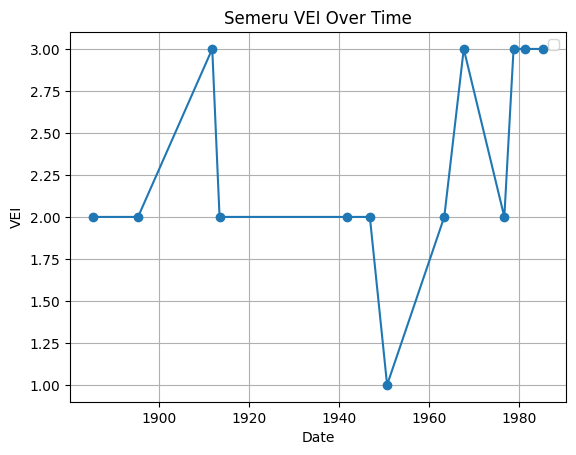

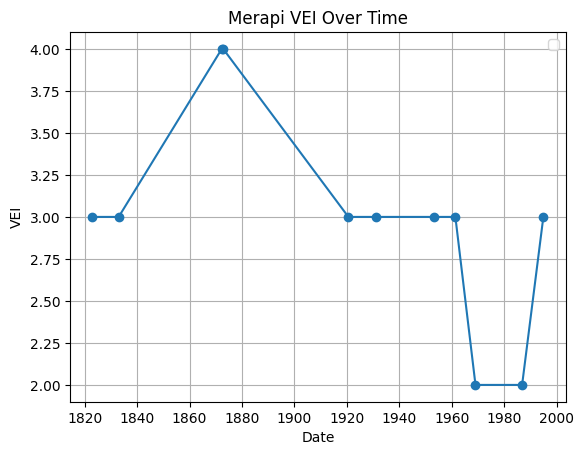

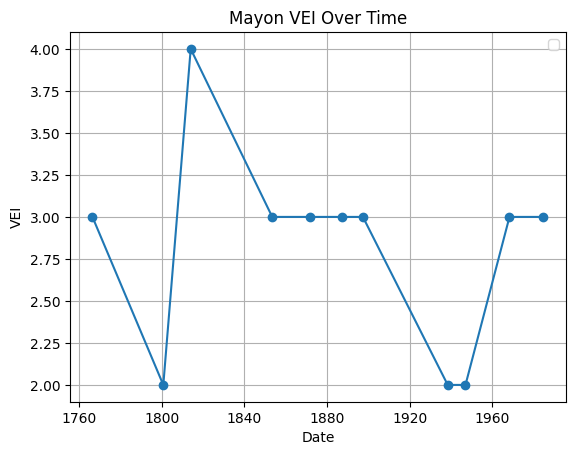

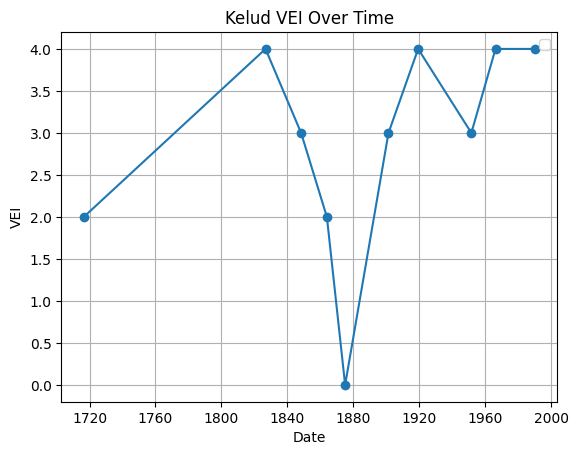

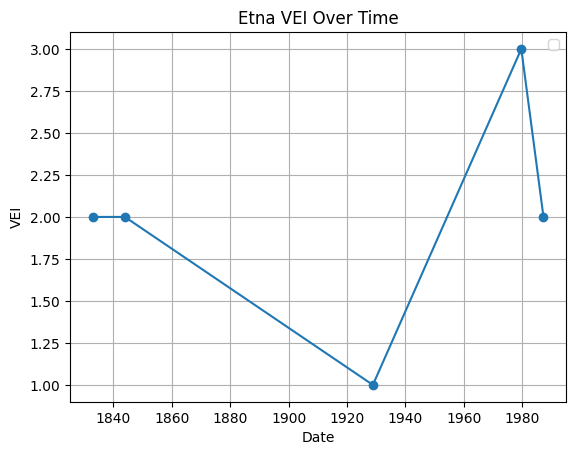

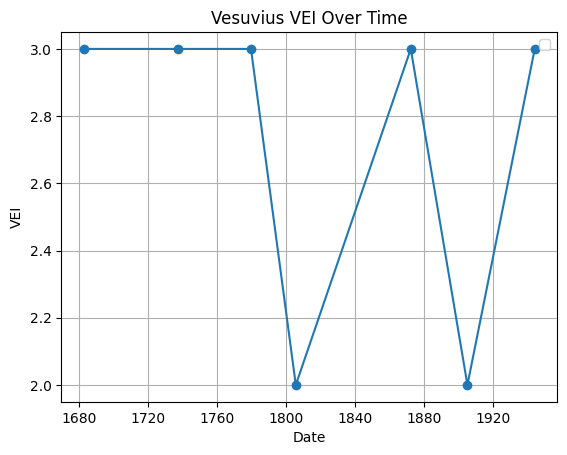

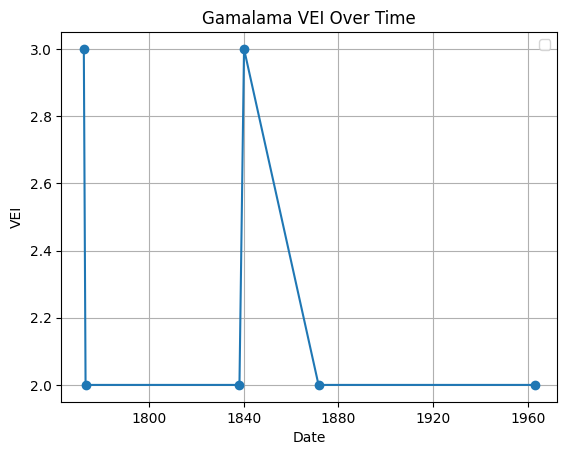

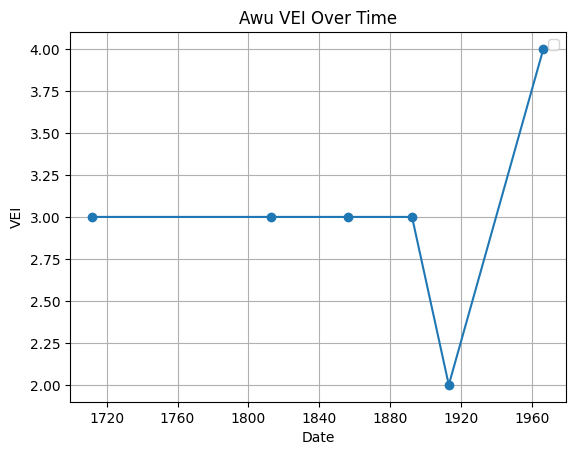

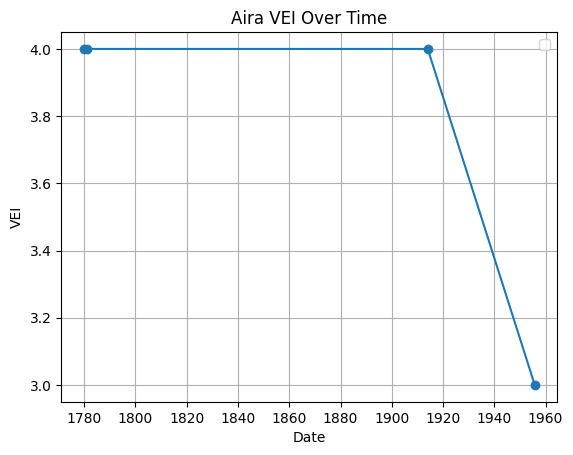

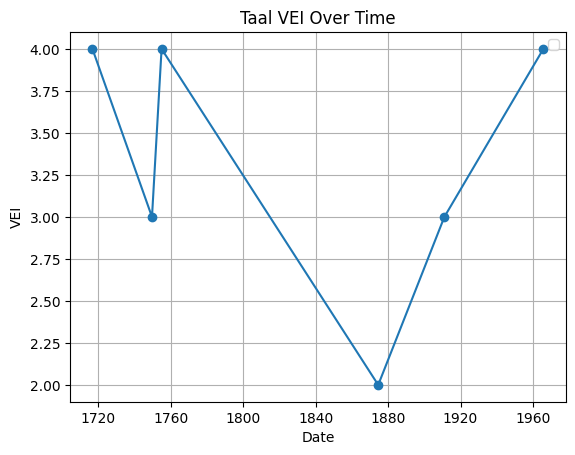

In [69]:
import matplotlib.pyplot as plt

volcano_counts = new_df['name'].value_counts()
frequent_volcanoes = volcano_counts[volcano_counts > 3].index

frequent_volcanoes = volcano_counts[volcano_counts > 3].index

for volcano_name in frequent_volcanoes:
    volc_df = new_df[new_df['name'] == volcano_name].sort_values(by='date')
    plt.figure()
    plt.plot(volc_df['date'], volc_df['vei'], marker='o', linestyle='-')
    plt.title(f"{volcano_name} VEI Over Time")
    plt.xlabel('Date')
    plt.ylabel('VEI')
    plt.legend()
    plt.grid(True)
    plt.show()


### **Part 3: Fiery Jobs 🚒 (15 POINTS TOTAL)**

Proficiency in **SQL** is also super important. SQL databases are essentially relational databases in which there are vast amounts of tabular data. which can often be used to connect with related tablular data. [This](https://www.w3schools.com/sql/) is a pretty good intro into learning more about SQL.

Check out this [tutorial](https://mode.com/sql-tutorial/introduction-to-sql/) for some clarifications on SQL.

Now! We'll be using **`sqlite`** to access a database.
* Start by downloading the sql lite file and putting it in the same directory as this [notebook](https://www.kaggle.com/datasets/kaggle/sf-salaries) (hit the 'download' button in the upper right).
* Check out the description of the data so you know the table / column names.

**The following code will use `sqlite3` to create a database connection.** `sqlite3` is the library in Python that assists in navigating through SQL databases.

**Note:** If you are working on this assignment via Google Colab, sometimes the runtime resets and it will throw errors.

***Instead of running through the entire notebook, run the notebook from the following code block and onwards:***
- Click anywhere on the next code block.
- Go up to where it says **'Runtime'** in the toolbar (right under the title of the notebook and **in between 'Insert' and 'Tools'**)
- Hover over it and **click on the option** that says **'Run cell and below'**

In [70]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("database.sqlite")
crsr = conn.cursor()

In [71]:
# This code will let you check out the different tables within the database.
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = crsr.execute(query).fetchall()
print(tables)

[('Salaries',), ('Salaries_2011',), ('Salaries_2012',), ('Salaries_2013',), ('Salaries_2014',)]


#### **Remember that each problem should be solved with a single SQL query.**
**Note: All outputs must be shown**
- Only include whatever fields are mentioned throughout each question, nothing more and nothing less.
- Follow each instruction clearly

#### **3.1.1: 2 Points**
From the **Salaries** table, get the **average base pay** for firefighters (all job titles consisting of the word "firefighter" **(not case-sensitive)**) between the **years 2012 to 2014**.

*Remember that firefighters that also occupy other professions are still considered firefighters.*

*Hint: Look into [this](https://www.w3schools.com/mysql/mysql_wildcards.asp) 👀*

In [72]:
query = """
SELECT AVG(BasePay) AS avg_base_pay
FROM Salaries
WHERE lower(JobTitle) LIKE '%Firefighter%' AND Year BETWEEN 2012 AND 2014;
"""

# KEEP THIS. It will display the whole dataframe.
df = pd.read_sql(query, conn)
df

,avg_base_pay
0,101657.66285


#### **3.1.2: 2 Points**
From the **Salaries** table, get all the firefighters (all job titles consisting of the word "firefighter" **(not case-sensitive)**) in the **year 2012** making under **$90,000 as a base pay.** **Sort** them in **descending** order by their pay.

*Remember that firefighters that also occupy other professions are still considered firefighters.*

In [73]:
query = """
SELECT *
FROM Salaries
WHERE lower(JobTitle) LIKE '%firefighter%'
  AND Year = 2012
  AND BasePay < 90000
ORDER BY BasePay DESC;

"""

# KEEP THIS. It will display the whole dataframe.
df = pd.read_sql(query, conn)
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,40505,Vincent Pampanin,Firefighter,89014.12,43348.93,14071.50,29906.93,146434.55,176341.48,2012,,San Francisco,
1,39771,Brook Mancinelli,EMT/Paramedic/Firefighter,86469.94,61993.52,6555.80,28036.61,155019.26,183055.87,2012,,San Francisco,
2,46472,Adam Lewis,EMT/Paramedic/Firefighter,85436.51,4646.71,13845.49,31365.62,103928.71,135294.33,2012,,San Francisco,
3,45756,Peter Johnson,Firefighter,84466.16,8504.68,13114.02,33638.41,106084.86,139723.27,2012,,San Francisco,
4,41897,Michael Craig,Firefighter,84466.15,30232.18,15369.85,35465.62,130068.18,165533.80,2012,,San Francisco,
5,45333,Matthew Estrada,Firefighter,84466.15,16600.28,8493.08,32948.76,109559.51,142508.27,2012,,San Francisco,
6,45250,Alberto Jaime Lopez,Firefighter,84386.06,11170.30,13865.19,33654.26,109421.55,143075.81,2012,,San Francisco,
7,45373,Nick Oxford,Firefighter,84305.99,8898.97,15379.31,33727.80,108584.27,142312.07,2012,,San Francisco,
8,47645,Daniel Sankey,Firefighter,84305.99,3583.40,8993.43,32688.52,96882.82,129571.34,2012,,San Francisco,
9,44841,Catherine Abrams,Firefighter,84305.98,15591.26,12152.55,33690.88,112049.79,145740.67,2012,,San Francisco,


#### **3.1.3: 4 Points**
From the **Salaries** table, first get the **averages** of **base pay**, **benefits**, and **overtime pay** for firefighters (all job titles consisting of the word "firefighter" **(not case-sensitive)**).

- Then, make a **column with the sum** of these **three averages**
- Finally, **exclude** job titles containing "FIREFIGHTER" **(case-sensitive)**

*Remember that firefighters that also occupy other professions are still considered firefighters.*

In [74]:
query = """
Select
  AVG(BasePay) AS avg_base_pay,
  AVG(Benefits) AS avg_benefits,
  AVG(OvertimePay) AS avg_overtime,
  (AVG(BasePay) + AVG(Benefits) + AVG(OvertimePay)) AS sum_avg
FROM Salaries
WHERE lower(JobTitle) NOT LIKE '%firefighter%'
  AND instr(JobTitle, 'firefighter') = 0;
"""

# KEEP THIS. It will display the whole dataframe.
df = pd.read_sql(query, conn)
df

,avg_base_pay,avg_benefits,avg_overtime,sum_avg
0,65064.135908,18629.155415,4478.383831,88171.675154


#### **3.1.4: 7 Points**

Finally, we'll make our own table in our database.

* Separate the **Salaries table** by **years**, and add it back to the database.
- Using a loop might be helpful.

* You may use basic python to complete the task. However, using querying on SQL is **mandatory**.
* Feel free to **use multiple lines of code for this problem only.**

*Hint: Check [this](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_sql.html) out*

In [75]:
years = [row[0] for row in crsr.execute("SELECT DISTINCT Year FROM Salaries").fetchall()]

for y in years:
  crsr.execute(f"""
    CREATE TABLE IF NOT EXISTS Salaries_{y} AS
    SELECT * FROM Salaries
    WHERE Year = {y};
  """)

In [76]:
# Run this code to check if you successfully added your table.
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('Salaries',), ('Salaries_2011',), ('Salaries_2012',), ('Salaries_2013',), ('Salaries_2014',)]


![volcano](https://as1.ftcdn.net/v2/jpg/06/34/76/64/1000_F_634766457_0fZbpYj6aBLlldO1jADUPpKTRLnNmngs.jpg)

# Part 4: BONUS SECTION (Pandas 'Group By')



This flowchart is taken from our lecture class presentation and illustrates the process of transforming data using the Pandas GroupBy operation. First, the data is input, followed by applying the GroupBy function to one or more columns of the DataFrame. Once the data is grouped, an aggregation function (such as sum(), mean(), or count()) is applied to compute summary statistics for each group

![bonus](https://drive.google.com/uc?export=view&id=1OeO3cVJSgmk6QxeBUp5ojJQUGVAPB-Jx)



Your task is to translate the workflow shown in the flowchart into Pandas queries that perform these operations step by step.

**Notes:** Your task is to translate the workflow shown in the flowchart into Pandas queries. Ensure that the **exact input and exact output** from the flowchart are replicated using Pandas queries, step by step.

**4.1 (Point 1)**

Create a **sample dataset** that includes columns for ***account, order,*** and ***ext price***.

In [77]:
# Create the Sample dataset from above flowchart
input_data = {
# REMOVE THIS COMMENT AND ANSWER STARTING HERE
}

# Create DataFrame

# REMOVE THIS COMMENT AND ANSWER STARTING HERE

# Display Dataframe (DONT REMOVE THE CODE)
df

,avg_base_pay,avg_benefits,avg_overtime,sum_avg
0,65064.135908,18629.155415,4478.383831,88171.675154


**4.2 (Point 1+1 =2 )**

Group by **order** and **show** the **intermediate results**

In [78]:
# Group by 'order' and show intermediate result

# REMOVE THIS COMMENT AND ANSWER STARTING HERE

# Display intermediate result for each group; hints: you have to use 'for loop'
print("\nIntermediate Grouped Data (Before Aggregation):")

# REMOVE THIS COMMENT AND ANSWER STARTING HERE


Intermediate Grouped Data (Before Aggregation):


**4.3 (Point 1 )** Apply the **Sum Aggregation** for **Each** Group

Now we'll apply the sum aggregation to get the ***total ext price*** for ***each order***:

In [79]:
# Repeat group by 'order' again and then apply aggregation (sum of 'ext_price' for each 'order')

# REMOVE THIS COMMENT AND ANSWER STARTING HERE

# Show the aggregated result after re-grouping  (DONT REMOVE THE CODE)
print("\nAggregated Data (Sum of 'ext_price' per 'order'):")
print(aggregated_result)


Aggregated Data (Sum of 'ext_price' per 'order'):


NameError: name 'aggregated_result' is not defined

**4.4 (Point 1)**  Combine the Results into One Final Table.

Finally, we will **reset the index** and create a combined table that shows order and the sum of the ext price for each group:


**Notes**: In pandas, `reset_index()` is a method used to reset the index of a DataFrame to its default integer-based index. By default, when you perform certain operations like `groupby()`, the resulting DataFrame may have a new index (e.g., the grouped column). The `reset_index()` method allows you to convert the current index back to a default sequential integer index and optionally, move the current index values into a regular column.


In [ ]:
# Reset index to combine result into a single DataFrame

# REMOVE THIS COMMENT AND ANSWER STARTING HERE

# Rename the columns for clarity

# REMOVE THIS COMMENT AND ANSWER STARTING HERE

# Show the final result  (DONT REMOVE THE CODE)
print("\nFinal Combined Result (Order and Total 'ext_price'):")
print(final_result)

# **THE END!**